In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 7)

In [16]:
df = sns.load_dataset('titanic')

In [17]:
df.shape

(891, 15)

In [18]:
print("Primeiras 5 linhas do DataFrame: ")
print(df.head(10))

Primeiras 5 linhas do DataFrame: 
   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman  

In [19]:
print("Informações Gerais do DataFrame: ")
df.info()

Informações Gerais do DataFrame: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [20]:
print("Estatísticas Descritivas: ")
print(df.describe())

Estatísticas Descritivas: 
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [21]:
print("Estatísticas Descritivas (para colunas categóricas/object): ")
print(df.describe(include=['object', 'category']))

Estatísticas Descritivas (para colunas categóricas/object): 
         sex embarked  class  who deck  embark_town alive
count    891      889    891  891  203          889   891
unique     2        3      3    3    7            3     2
top     male        S  Third  man    C  Southampton    no
freq     577      644    491  537   59          644   549


In [22]:
print("Dados Faltantes por Coluna: ")
print(df.isnull().sum())

Dados Faltantes por Coluna: 
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [23]:
df_processed = df.copy()

In [24]:
# Estratégia 1: Preencher 'age' (Idade)
# Opção A: Média (comentada, pois mediana é geralmente melhor para dados com outliers)
# age_mean = df_processed['age'].mean()
# df_processed['age_filled_mean'] = df_processed['age'].fillna(age_mean)
# print(f"\n'age' preenchida com a média: {age_mean:.2f}")

In [25]:
# Opção B: Mediana
age_median = df_processed['age'].median()
df_processed.fillna({'age': age_median}, inplace=True)
#df_processed['age'].fillna(age_median, inplace=True)
print(f"\nColuna 'age': Valores faltantes preenchidos com a mediana ({age_median:.2f}).")


Coluna 'age': Valores faltantes preenchidos com a mediana (28.00).


In [26]:
# Estratégia 2: Preencher 'embarked' e 'embark_town' (Porto de Embarque)
# São variáveis categóricas, usaremos a moda.
embarked_mode = df_processed['embarked'].mode()[0] # mode() retorna uma Series, pegamos o primeiro valor
df_processed.fillna({'embarked': embarked_mode}, inplace=True)
print(f"Coluna 'embarked': Valores faltantes preenchidos com a moda ('{embarked_mode}').")

Coluna 'embarked': Valores faltantes preenchidos com a moda ('S').


In [27]:
embark_town_mode = df_processed['embark_town'].mode()[0]
df_processed.fillna({'embark_town': embark_town_mode}, inplace=True)
print(f"Coluna 'embark_town': Valores faltantes preenchidos com a moda ('{embark_town_mode}').")

Coluna 'embark_town': Valores faltantes preenchidos com a moda ('Southampton').


In [28]:
# Estratégia 3: Remover a coluna 'deck'
# A coluna 'deck' tem uma quantidade muito grande de valores ausentes (mais de 77%).
# Em muitos casos, é melhor removê-la.
df_processed.drop('deck', axis=1, inplace=True)
print("Coluna 'deck': Removida devido à alta porcentagem de dados faltantes.")

Coluna 'deck': Removida devido à alta porcentagem de dados faltantes.


In [29]:
# A coluna 'who' e 'adult_male' podem ser derivadas de 'sex' e 'age',
# 'alive' é o inverso de 'survived'. Vamos verificar se ainda há dados faltantes.
print("Dados Faltantes Após Tratamento Inicial: ")
print(df_processed.isnull().sum())

Dados Faltantes Após Tratamento Inicial: 
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


Text(0, 0.5, 'Tarifa')

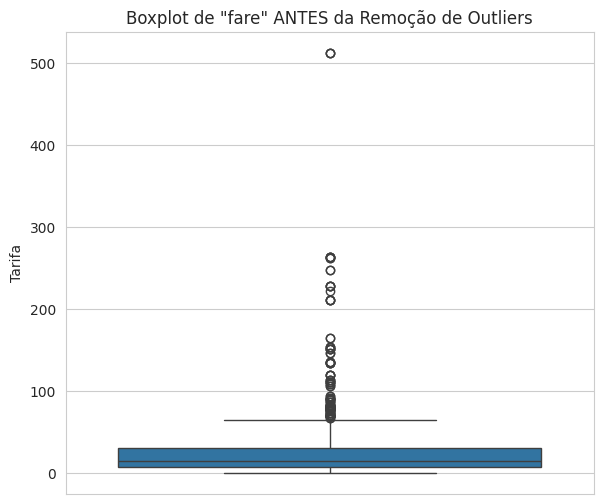

In [30]:
# Remoção de Outliers (Exemplo com a coluna 'fare' - Tarifa)
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1) # 1 linha, 2 colunas, primeiro plot
sns.boxplot(y=df_processed['fare'])
plt.title('Boxplot de "fare" ANTES da Remoção de Outliers')
plt.ylabel('Tarifa')

In [31]:
# Usando o método IQR (Intervalo Interquartil)
Q1 = df_processed['fare'].quantile(0.25)
Q3 = df_processed['fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nDetalhes para 'fare':")
print(f"  Q1 (25º percentil): {Q1:.2f}")
print(f"  Q3 (75º percentil): {Q3:.2f}")
print(f"  IQR (Intervalo Interquartil): {IQR:.2f}")
print(f"  Limite Inferior para Outliers: {lower_bound:.2f}")
print(f"  Limite Superior para Outliers: {upper_bound:.2f}")


Detalhes para 'fare':
  Q1 (25º percentil): 7.91
  Q3 (75º percentil): 31.00
  IQR (Intervalo Interquartil): 23.09
  Limite Inferior para Outliers: -26.72
  Limite Superior para Outliers: 65.63


In [32]:
# Identificando outliers
outliers = df_processed[(df_processed['fare'] < lower_bound) | (df_processed['fare'] > upper_bound)]
print(f"  Número de outliers identificados em 'fare': {len(outliers)}")

  Número de outliers identificados em 'fare': 116


In [33]:
# Removendo outliers (criando um novo DataFrame sem os outliers de 'fare')
# Poderíamos também substituir os outliers pelos limites, mas aqui vamos remover.
df_no_outliers = df_processed[(df_processed['fare'] >= lower_bound) & (df_processed['fare'] <= upper_bound)]

print(f"\nTamanho do DataFrame ANTES da remoção de outliers de 'fare': {df_processed.shape}")
print(f"Tamanho do DataFrame APÓS a remoção de outliers de 'fare': {df_no_outliers.shape}")


Tamanho do DataFrame ANTES da remoção de outliers de 'fare': (891, 14)
Tamanho do DataFrame APÓS a remoção de outliers de 'fare': (775, 14)


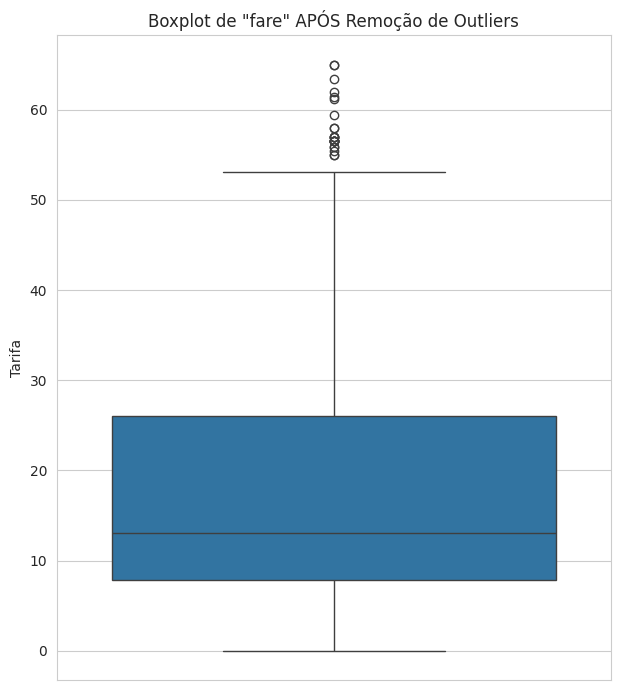

In [34]:
plt.subplot(1, 2, 2) # 1 linha, 2 colunas, segundo plot
sns.boxplot(y=df_no_outliers['fare'])
plt.title('Boxplot de "fare" APÓS Remoção de Outliers')
plt.ylabel('Tarifa')

plt.tight_layout() # Ajusta o layout para evitar sobreposição de títulos
plt.show()

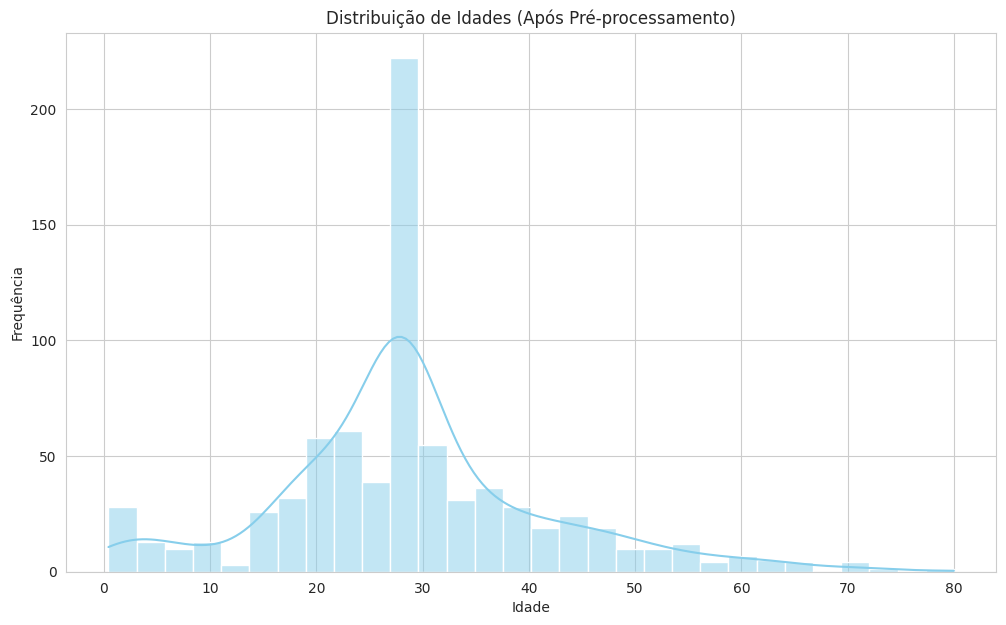

In [35]:
# 5. Análise e Visualização dos Dados Pré-processados
# Usaremos df_no_outliers para as visualizações seguintes, pois 'fare' foi tratada.

# Histograma da Idade ('age')
plt.figure()
sns.histplot(df_no_outliers['age'], kde=True, bins=30, color='skyblue')
plt.title('Distribuição de Idades (Após Pré-processamento)')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

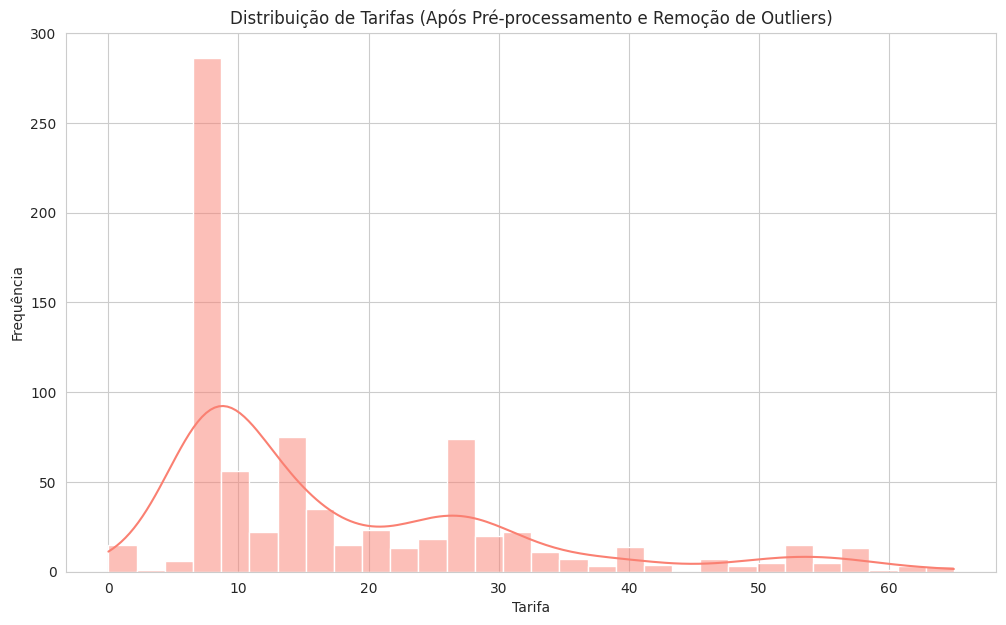

In [36]:
# Histograma da Tarifa ('fare')
plt.figure()
sns.histplot(df_no_outliers['fare'], kde=True, bins=30, color='salmon')
plt.title('Distribuição de Tarifas (Após Pré-processamento e Remoção de Outliers)')
plt.xlabel('Tarifa')
plt.ylabel('Frequência')
plt.show()

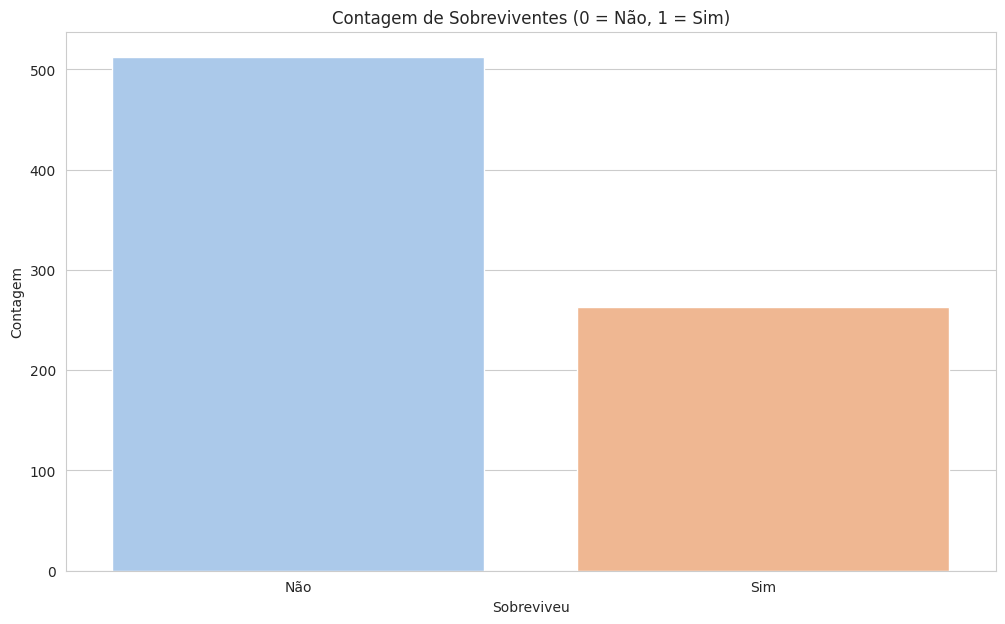

In [37]:
# Gráfico de Barras para Sobreviventes ('survived')
plt.figure()
sns.countplot(x='survived', hue='survived', data=df_no_outliers, palette='pastel', legend=False)
plt.title('Contagem de Sobreviventes (0 = Não, 1 = Sim)')
plt.xlabel('Sobreviveu')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

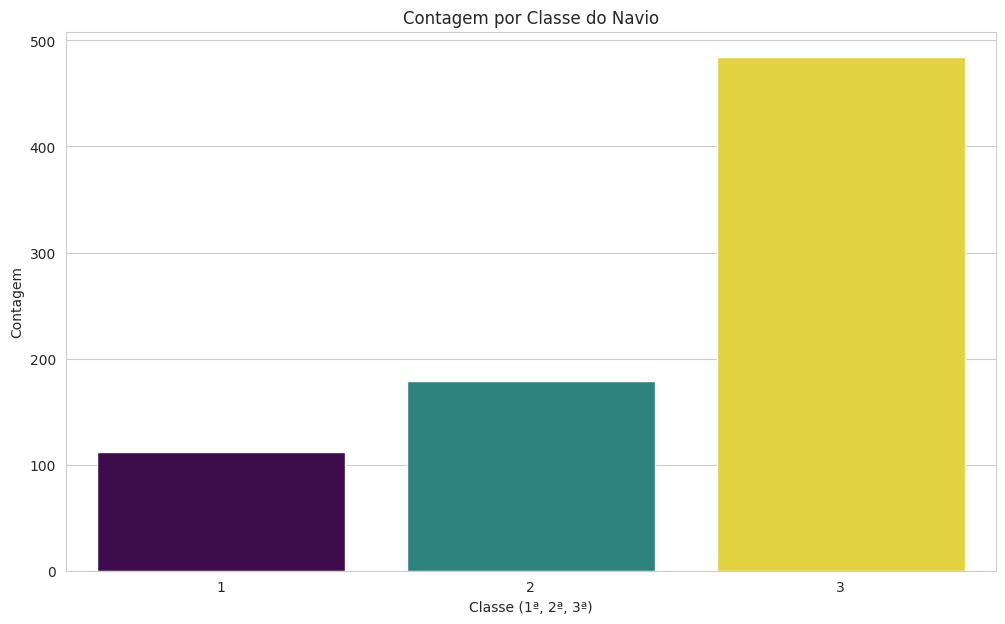

In [38]:
# Gráfico de Barras para Classe ('pclass')
plt.figure()
sns.countplot(data=df_no_outliers, x='pclass', hue='pclass', palette='viridis', legend=False)
plt.title('Contagem por Classe do Navio')
plt.xlabel('Classe (1ª, 2ª, 3ª)')
plt.ylabel('Contagem')
plt.show()



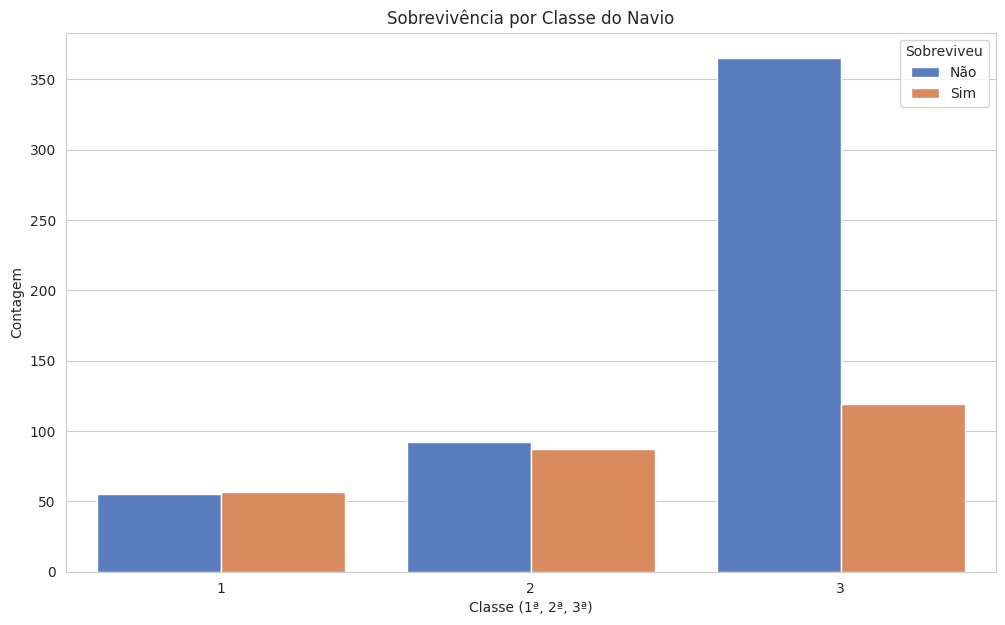

In [39]:
# Relação entre Classe e Sobrevivência
plt.figure()
sns.countplot(x='pclass', hue='survived', data=df_no_outliers, palette='muted')
plt.title('Sobrevivência por Classe do Navio')
plt.xlabel('Classe (1ª, 2ª, 3ª)')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

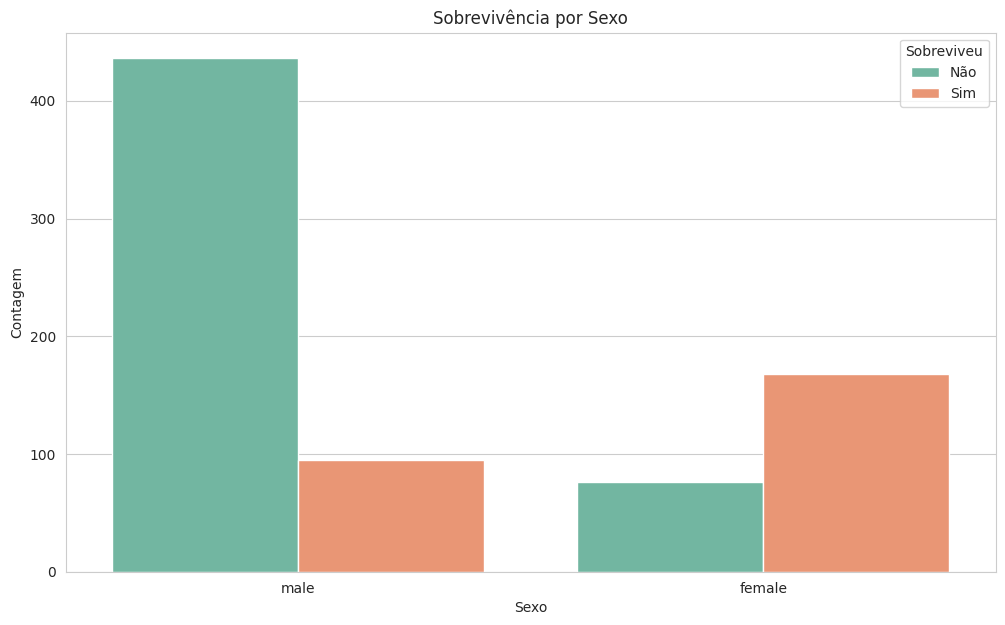

In [40]:
# Relação entre Sexo e Sobrevivência
plt.figure()
sns.countplot(x='sex', hue='survived', data=df_no_outliers, palette='Set2')
plt.title('Sobrevivência por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

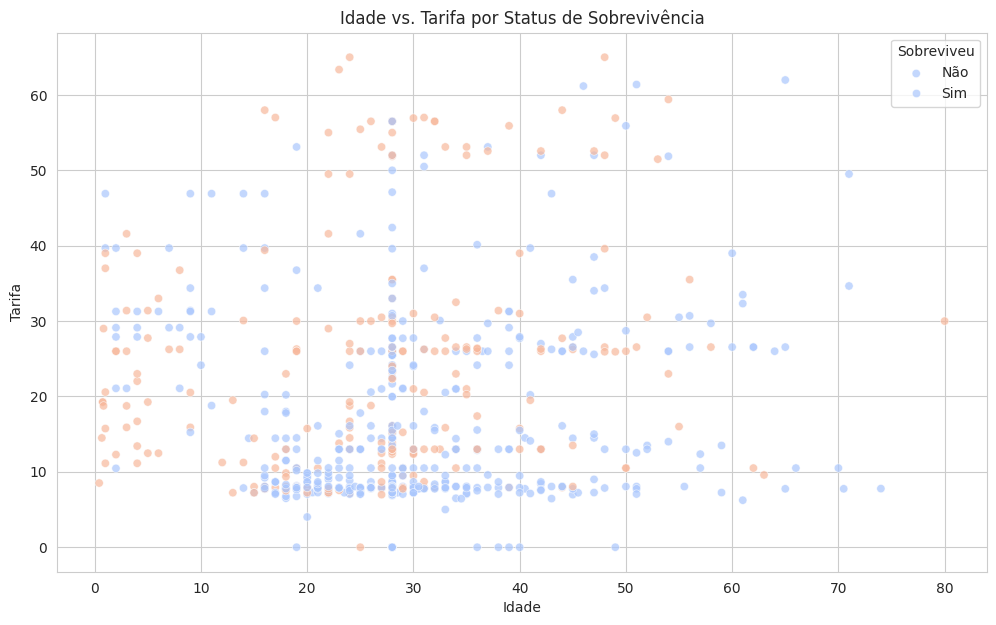

In [41]:
# Scatter plot: Idade vs Tarifa, colorido por Sobrevivência
plt.figure()
sns.scatterplot(x='age', y='fare', hue='survived', data=df_no_outliers, alpha=0.7, palette='coolwarm')
plt.title('Idade vs. Tarifa por Status de Sobrevivência')
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

In [42]:
# Mapa de Calor para Correlações entre variáveis numéricas
# Primeiro, vamos selecionar apenas colunas numéricas para o cálculo da correlação.
# Também podemos converter 'sex' para numérico para incluir no heatmap.
df_corr = df_no_outliers.copy()
df_corr['sex_numeric'] = df_corr['sex'].map({'male': 0, 'female': 1})


In [43]:
# Selecionando colunas que em sua essência são numéricas ou foram convertidas
numerical_cols_for_corr = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_numeric']
correlation_matrix = df_corr[numerical_cols_for_corr].corr()


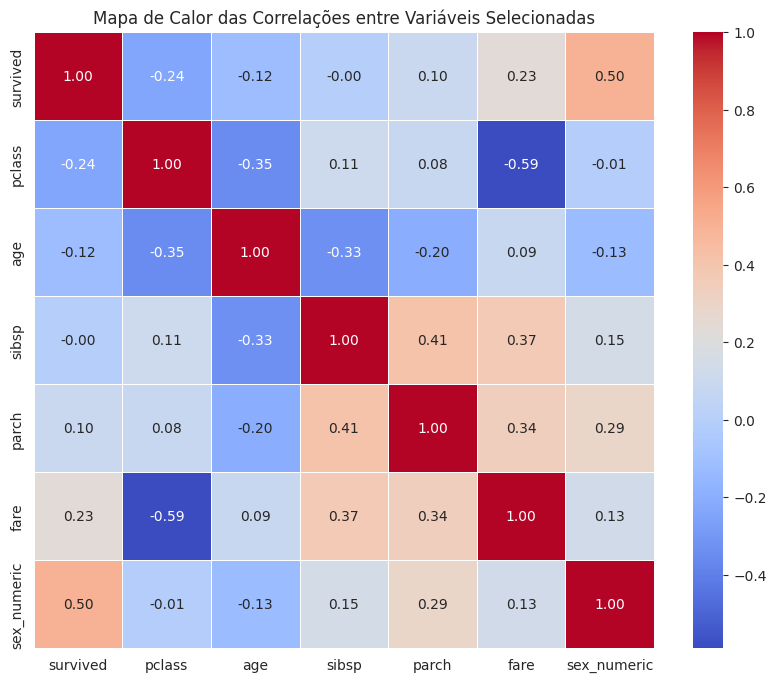

In [44]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar=True)
plt.title('Mapa de Calor das Correlações entre Variáveis Selecionadas')
plt.show()

In [45]:
print("Estatísticas Descritivas Finais (Após Pré-processamento e Remoção de Outliers de 'fare'): ")
print(df_no_outliers.describe(include='all'))

Estatísticas Descritivas Finais (Após Pré-processamento e Remoção de Outliers de 'fare'): 
          survived     pclass   sex         age       sibsp       parch  \
count   775.000000  775.00000   775  775.000000  775.000000  775.000000   
unique         NaN        NaN     2         NaN         NaN         NaN   
top            NaN        NaN  male         NaN         NaN         NaN   
freq           NaN        NaN   531         NaN         NaN         NaN   
mean      0.339355    2.48000   NaN   28.748710    0.437419    0.340645   
std       0.473796    0.73439   NaN   12.782123    0.899838    0.785914   
min       0.000000    1.00000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.00000   NaN   22.000000    0.000000    0.000000   
50%       0.000000    3.00000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.00000   NaN   34.000000    1.000000    0.000000   
max       1.000000    3.00000   NaN   80.000000    5.000000    6.000000   

        